
# FETAL HEALTH #

author by Fatwa Azhar Nurfahmi 
pada dataset kali ini Klasifikasi kesehatan janin untuk mencegah kematian anak dan ibu.

deskripsi :

Pengurangan kematian anak tercermin dalam beberapa Tujuan Pembangunan Berkelanjutan Perserikatan Bangsa-Bangsa dan merupakan indikator utama kemajuan manusia.

Cardiotocograms (CTGs) adalah pilihan yang sederhana dan terjangkau untuk menilai kesehatan janin, memungkinkan profesional perawatan kesehatan untuk mengambil tindakan guna mencegah kematian ibu dan anak. Peralatan itu sendiri bekerja dengan mengirimkan denyut ultrasonik dan membaca responsnya, sehingga menjelaskan detak jantung janin (DJJ), gerakan janin, kontraksi uterus, dan banyak lagi.
 
Tugas :
Buat model untuk mengklasifikasikan hasil pemeriksaan Cardiotocogram (CTG) (yang mewakili kesejahteraan janin).

Catatan :
Perhatikan bahwa ini adalah masalah multiclass yang juga bisa diperlakukan sebagai regresi (karena labelnya progresif).
Perhatikan juga bahwa ada ketidakseimbangan kelas yang cukup besar dan oleh karena itu akurasi tidak direkomendasikan karena metrik primer dan stratifikasi direkomendasikan saat memisahkan data.

# library #


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

 # Data extraction #
 
 

In [2]:
df = pd.read_csv("../data/fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
df.shape

(2126, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df.isna().sum()


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [8]:
df.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Data exploration #

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


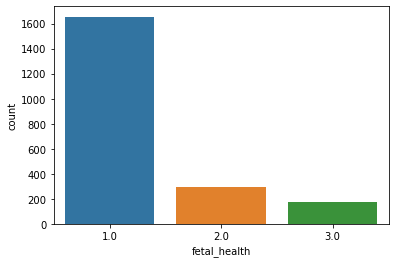

In [9]:
sns.countplot(x='fetal_health', data=df)
print(df['fetal_health'].value_counts())

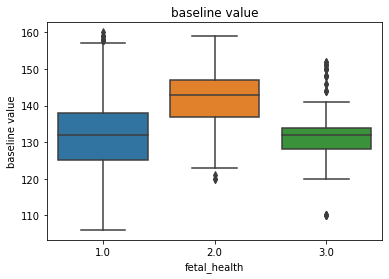

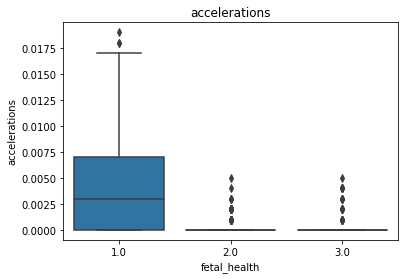

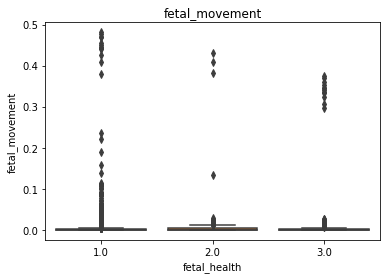

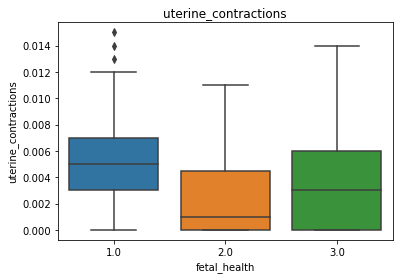

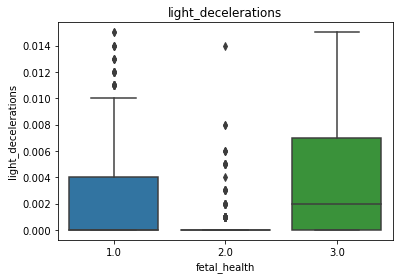

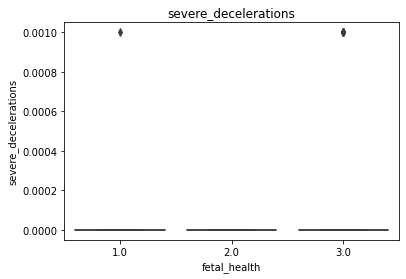

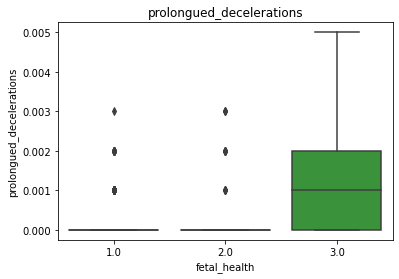

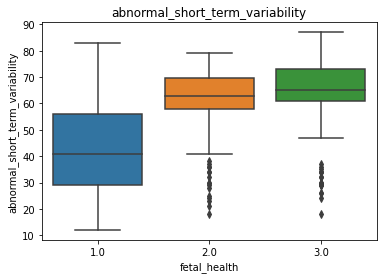

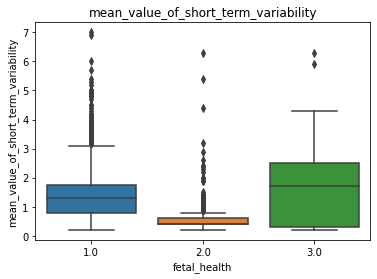

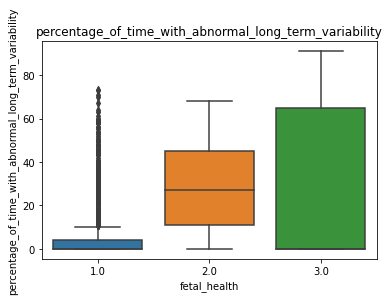

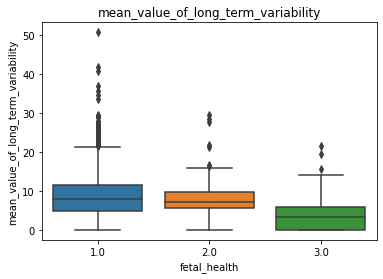

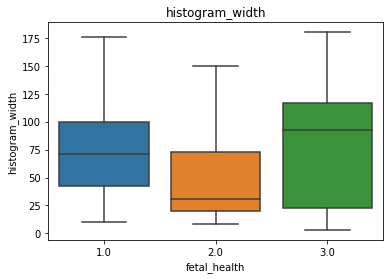

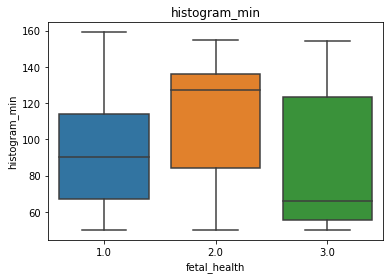

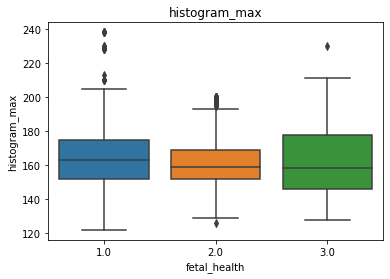

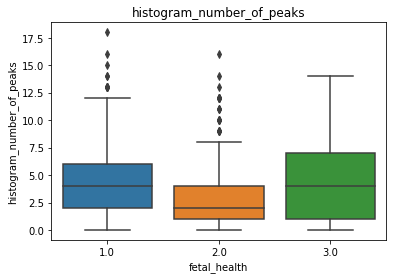

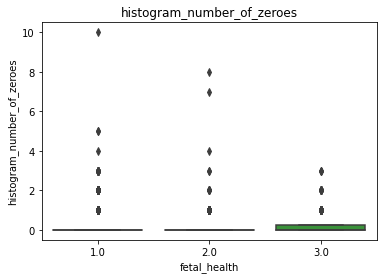

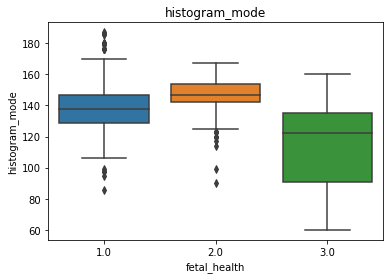

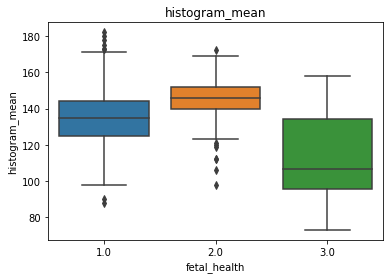

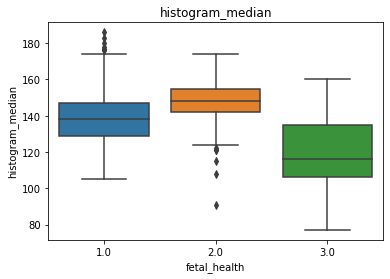

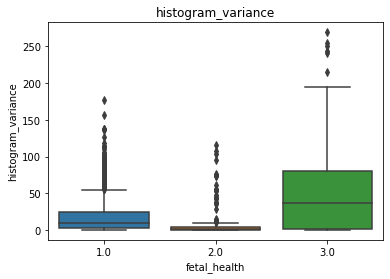

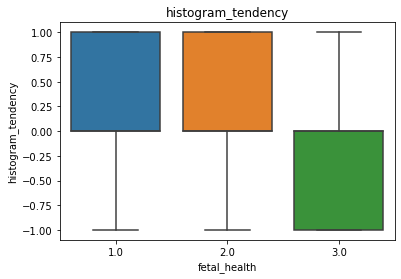

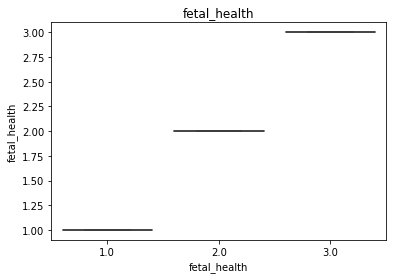

In [10]:
for i, column in enumerate(df.columns):
    sns.boxplot(x='fetal_health', y=column, data=df)
    plt.title(column)
    plt.show()
    print()

In [11]:
df.corr(method = "pearson")


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [12]:
C = df.corr(method = "pearson")
C_sorted = C.sort_values( by=['fetal_health'], ascending = False)
C_sorted["fetal_health"]

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

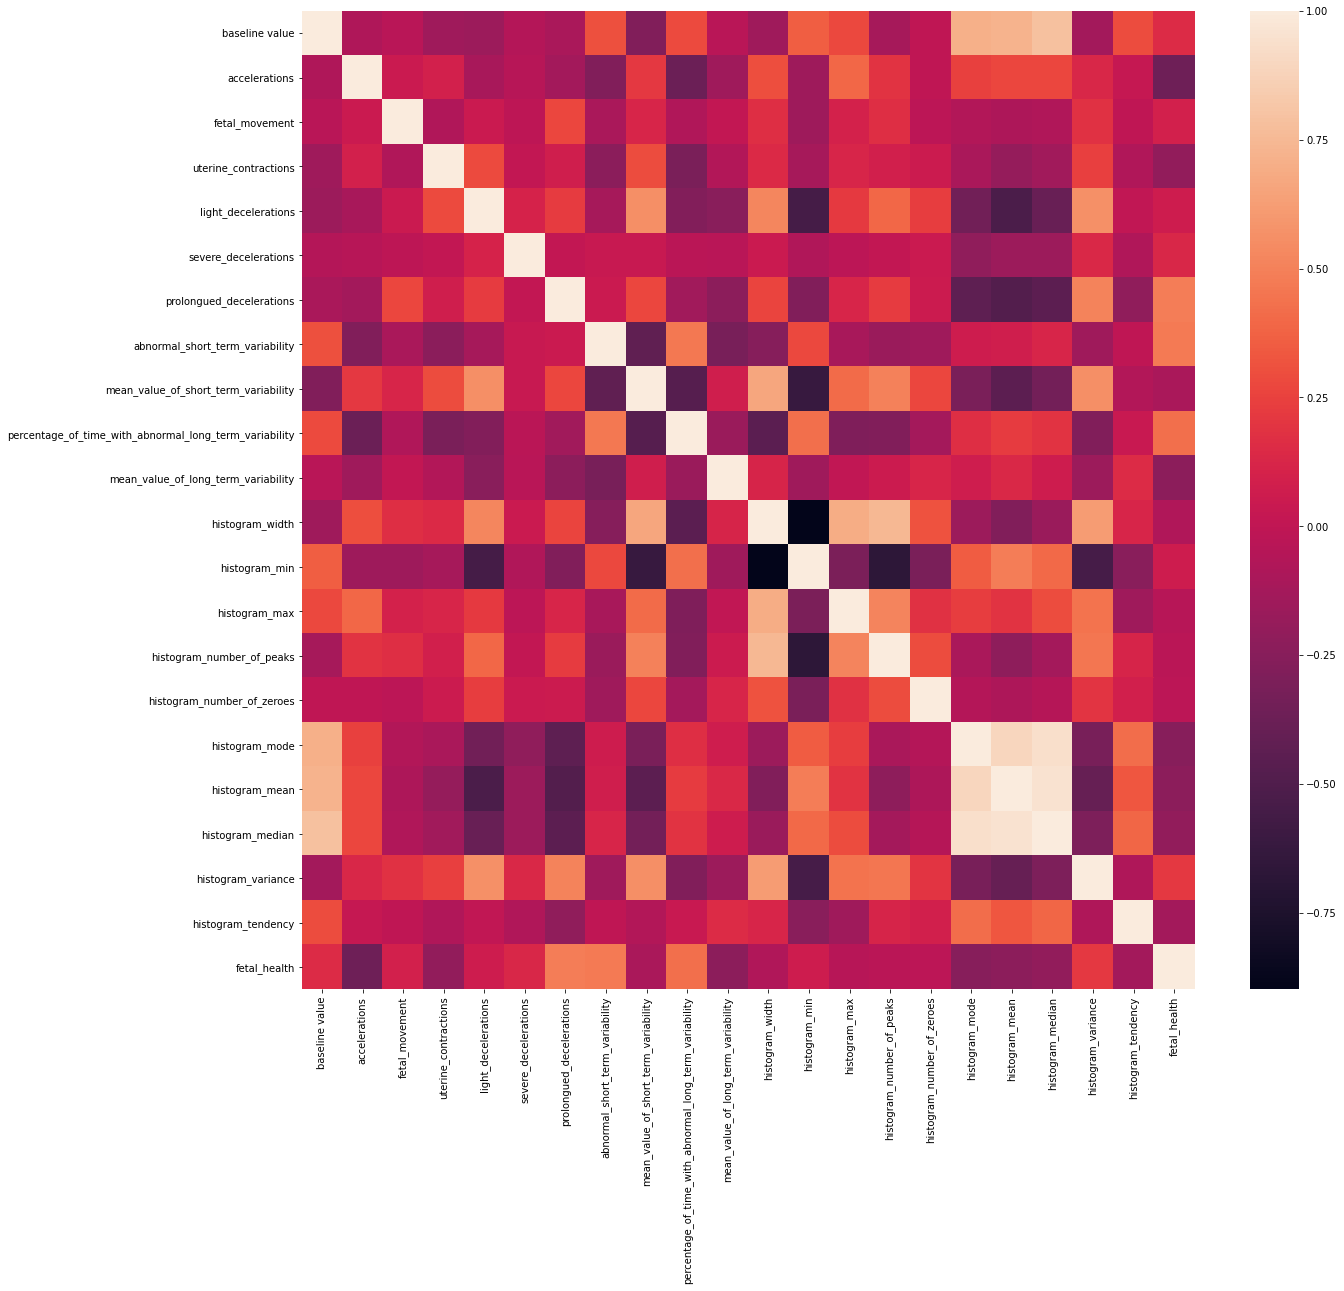

In [13]:
fig, ax = plt.subplots(figsize=(20,18))  
sns.heatmap(df.corr())

In [14]:
c = df.corr(method = "pearson")
c_sorted = c.sort_values( by=['fetal_health'], ascending = False)
c_sorted["fetal_health"]

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

# data  preprocesing #


In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing



## Feature Selection #

In [16]:
##selected_features = [ 'prolongued_decelerations', "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", 'histogram_variance' , 'baseline value', "severe_decelerations","fetal_health"]

##selected_df = df[selected_features]
##selected_df.head()

In [17]:
##selected_df["fetal_health"] = df["fetal_health"]
##selected_df.head()

## Remove outlier #

In [18]:
##q = selected_df["fetal_health"].quantile(0.95)
#filtered_df = selected_df[ selected_df["fetal_health"] < q] 
#filtered_df.head()


In [19]:
#filtered_df.shape


# data scaling ( Normalisasi)


In [20]:

##x = df[selected_features]
##y = df["fetal_health"]
##x.head()

In [21]:
##x = df[selected_features].values
##min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)

In [22]:
###normalized_data = pd.DataFrame(x_scaled, columns = selected_features)
#normalized_data.head()

In [23]:
##x = normalized_data.values

##y = df["fetal_health"].values

In [24]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_x = StandardScaler()
x =  pd.DataFrame(scale_x.fit_transform(df.drop(["fetal_health"],axis = 1),), columns = columns)
y = df["fetal_health"]

x.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [25]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

x_train


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1718,-0.234167,1.247640,-0.203210,-0.803434,-0.300544,-0.057476,-0.268754,0.407817,0.189365,-0.535361,...,0.399370,-0.357981,0.277292,0.994270,-0.458444,0.827234,0.473990,0.616025,0.110177,1.112980
857,0.883886,-0.822388,-0.203210,-0.124404,-0.638438,-0.057476,-0.268754,-0.173958,-0.603357,-0.480991,...,-0.987146,1.097020,-0.335865,-1.040530,-0.458444,0.460877,0.730565,0.616025,-0.580173,-0.524526
1075,0.375680,-0.304881,-0.203210,0.894142,1.388924,-0.057476,-0.268754,-1.162976,0.302611,-0.535361,...,0.270989,-0.256469,0.165809,-0.701397,-0.458444,0.399817,0.089126,0.201179,0.144694,1.112980
371,0.477322,-0.822388,-0.010304,-0.803434,0.037349,-0.057476,-0.268754,0.465995,-0.716603,-0.535361,...,-0.576326,0.318764,-0.726055,-0.023130,-0.458444,0.399817,0.345702,0.339461,-0.476621,1.112980
222,-0.437449,-0.304881,0.075432,-1.482465,-0.638438,-0.057476,-0.268754,0.000575,-0.490111,-0.535361,...,0.861543,-1.406934,-0.447348,0.655137,-0.458444,-0.271839,-0.103306,-0.282808,-0.511138,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.335808,1.506393,-0.181776,-0.124404,-0.300544,-0.057476,-0.268754,0.291462,-0.037127,-0.535361,...,0.733161,-0.696353,0.444516,0.655137,-0.458444,0.399817,0.409846,0.408602,-0.096928,1.112980
1095,-1.047296,2.282654,-0.203210,-0.803434,-0.638438,-0.057476,-0.268754,-1.453863,0.982087,-0.535361,...,-0.473621,0.217252,-0.670314,-0.701397,-0.458444,-0.393958,-0.167450,-0.351949,-0.511138,-0.524526
1130,-1.148938,0.471379,-0.203210,-0.124404,1.051030,-0.057476,-0.268754,-1.570218,1.435070,-0.535361,...,0.707485,-1.136237,-0.335865,0.655137,-0.458444,-0.393958,-0.873034,-0.835937,0.420834,-0.524526
1294,-1.860426,-0.046128,-0.203210,1.233657,0.037349,-0.057476,1.426711,-1.337508,0.302611,-0.535361,...,0.964247,-0.764027,0.834706,-0.362263,2.374846,-0.271839,-0.808890,-0.628514,0.904079,-0.524526


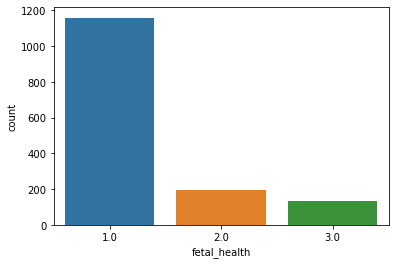

In [26]:
sns.countplot(x = y_train, data = df)

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {} ".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(y_train==3)))

sm = SMOTE()
x_res, y_res = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_res==3)))



Before OverSampling, counts of label '1': 1159
Before OverSampling, counts of label '2': 194 
Before OverSampling, counts of label '3': 135 

After OverSampling, the shape of train_X: (3477, 21)
After OverSampling, the shape of train_y: (3477,) 

After OverSampling, counts of label '1': 1159
After OverSampling, counts of label '2': 1159
After OverSampling, counts of label '3': 1159


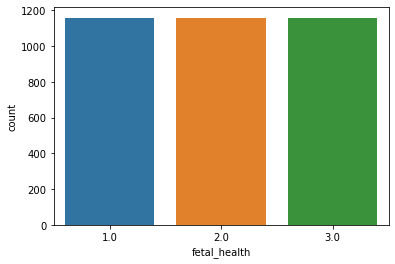

In [28]:
sns.countplot(x = y_res, data = df)



In [29]:

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Modelling #


## DecisionTree ##

In [30]:
dtc = DecisionTreeClassifier(random_state=2020)
dtc.fit(x_res, y_res)
dtc_pred = dtc.predict(x_test)
print(confusion_matrix(dtc_pred, y_test))
print('-----')
print(classification_report(dtc_pred, y_test, digits=4))

[[471  18   2]
 [ 23  81   1]
 [  2   2  38]]
-----
              precision    recall  f1-score   support

         1.0     0.9496    0.9593    0.9544       491
         2.0     0.8020    0.7714    0.7864       105
         3.0     0.9268    0.9048    0.9157        42

    accuracy                         0.9248       638
   macro avg     0.8928    0.8785    0.8855       638
weighted avg     0.9238    0.9248    0.9242       638



## random forest ##


In [31]:
import random

random.seed(2021)
rf = RandomForestClassifier(random_state=2020)
rf.fit(x_res, y_res)
rf_pred = rf.predict(x_test)
print(confusion_matrix( y_test, rf_pred ))
print('-----')
print(classification_report(rf_pred, y_test, digits=4))

[[478  16   2]
 [ 13  84   4]
 [  2   1  38]]
-----
              precision    recall  f1-score   support

         1.0     0.9637    0.9696    0.9666       493
         2.0     0.8317    0.8317    0.8317       101
         3.0     0.9268    0.8636    0.8941        44

    accuracy                         0.9404       638
   macro avg     0.9074    0.8883    0.8975       638
weighted avg     0.9403    0.9404    0.9403       638



## logistic regression ##

In [32]:
lr = LogisticRegression(random_state=2020)
lr.fit(x_res, y_res)
lr_pred = lr.predict(x_test)
print(confusion_matrix(lr_pred, y_test))
print('-----')
print(classification_report(lr_pred, y_test, digits=4))

[[426   7   1]
 [ 59  78   5]
 [ 11  16  35]]
-----
              precision    recall  f1-score   support

         1.0     0.8589    0.9816    0.9161       434
         2.0     0.7723    0.5493    0.6420       142
         3.0     0.8537    0.5645    0.6796        62

    accuracy                         0.8448       638
   macro avg     0.8283    0.6985    0.7459       638
weighted avg     0.8391    0.8448    0.8321       638



C:\Users\anfr6\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## svc ##

In [33]:
svc = SVC(random_state=2020)
svc.fit(x_res, y_res)
svc_pred = svc.predict(x_test)
print(confusion_matrix(svc_pred, y_test))
print('-----')
print(classification_report(svc_pred, y_test, digits=4)) 

[[429   5   2]
 [ 63  86   2]
 [  4  10  37]]
-----
              precision    recall  f1-score   support

         1.0     0.8649    0.9839    0.9206       436
         2.0     0.8515    0.5695    0.6825       151
         3.0     0.9024    0.7255    0.8043        51

    accuracy                         0.8652       638
   macro avg     0.8729    0.7597    0.8025       638
weighted avg     0.8647    0.8652    0.8550       638



## knn##

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_res, y_res)
knn_pred = knn.predict(x_test)
print(confusion_matrix(knn_pred, y_test))
print('-----')
print(classification_report(knn_pred, y_test, digits=4))

[[422   5   1]
 [ 67  82   3]
 [  7  14  37]]
-----
              precision    recall  f1-score   support

         1.0     0.8508    0.9860    0.9134       428
         2.0     0.8119    0.5395    0.6482       152
         3.0     0.9024    0.6379    0.7475        58

    accuracy                         0.8480       638
   macro avg     0.8550    0.7211    0.7697       638
weighted avg     0.8462    0.8480    0.8352       638



In [35]:
cross_valid_scores = {}


# decision tree  parameter #

In [36]:
%%time
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_dtc = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)

model_dtc = GridSearchCV(
    model_dtc, 
    parameters, 
    cv=5,
)

model_dtc.fit(x_res, y_res)
model_dtc_pred = model_dtc.predict(x_test)
print(classification_report(model_dtc_pred, y_test))

print('-----')
print(f'Best parameters {model_dtc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_dtc.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_dtc.best_score_
print('-----')

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       478
         2.0       0.85      0.71      0.77       121
         3.0       0.93      0.97      0.95        39

    accuracy                           0.92       638
   macro avg       0.90      0.88      0.89       638
weighted avg       0.91      0.92      0.91       638

-----
Best parameters {'max_depth': 11}
Mean cross-validated accuracy score of the best_estimator: 0.953
-----
Wall time: 927 ms


# Randomforest parameter

In [37]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)

model_rf = GridSearchCV(
    model_rf, 
    parameters, 
    cv=5,
)

model_rf.fit(x_res, y_res)
model_rf_pred = model_rf.predict(x_test)
print(classification_report(model_rf_pred, y_test))

print('-----')
print(f'Best parameters {model_rf.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_rf.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_rf.best_score_
print('-----')

              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       479
         2.0       0.88      0.79      0.83       113
         3.0       0.98      0.87      0.92        46

    accuracy                           0.94       638
   macro avg       0.93      0.88      0.91       638
weighted avg       0.94      0.94      0.94       638

-----
Best parameters {'max_depth': 13, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.974
-----
Wall time: 13 s


# Logistic Regression parameter

In [38]:
%%time
parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

model_lr = LogisticRegression(
    random_state=42,
    class_weight="balanced",
    solver="liblinear",
)

model_lr = GridSearchCV(
    model_lr, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_lr.fit(x_train, y_train)
model_lr_pred = model_lr.predict(x_test)
print(classification_report(model_lr_pred, y_test))

print('-----')
print(f'Best parameters {model_lr.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_lr.best_score_:.3f}'
)
cross_valid_scores['logistic_regression'] = model_lr.best_score_
print('-----')

              precision    recall  f1-score   support

         1.0       0.89      0.97      0.93       455
         2.0       0.72      0.61      0.66       120
         3.0       0.88      0.57      0.69        63

    accuracy                           0.86       638
   macro avg       0.83      0.72      0.76       638
weighted avg       0.86      0.86      0.86       638

-----
Best parameters {'C': 1.0, 'penalty': 'l1'}
Mean cross-validated accuracy score of the best_estimator: 0.890
-----
Wall time: 949 ms


# knn parameter


In [39]:
%%time
parameters = {
    "weights": ["uniform", "distance"],
}

model_k_neighbors = KNeighborsClassifier(
)

model_k_neighbors = GridSearchCV(
    model_k_neighbors, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_k_neighbors.fit(x_train, y_train)
model_k_neighbors_pred = model_k_neighbors.predict(x_test)
print(classification_report(model_k_neighbors_pred, y_test))

print('-----')
print(f'Best parameters {model_k_neighbors.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_k_neighbors.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] = model_k_neighbors.best_score_
print('-----')

              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       509
         2.0       0.71      0.83      0.77        87
         3.0       0.83      0.81      0.82        42

    accuracy                           0.92       638
   macro avg       0.84      0.86      0.85       638
weighted avg       0.93      0.92      0.92       638

-----
Best parameters {'weights': 'distance'}
Mean cross-validated accuracy score of the best_estimator: 0.901
-----
Wall time: 299 ms


In [40]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)


NameError: name 'acc_frame' is not defined